# Abstract:

#### The suggested work's goal is to anticipate a person's insurance costs and to identify patients with health insurance policies and medical information, regardless of whether or not they have any health problems. Several sorts of health insurance must be anticipated for a patient. It is possible to estimate an individual's health insurance costs based on the level of emergency department treatment they receive depending on the type of health insurance they possess.Linear Regression,Random Forest Regressor, Desicion Tree Regressor, XGBoost  were some of the regression models employed in this study. After comparing the accuracies, it was determined that Gradient Boosting was the most accurate of all the methods, with an accuracy of 85 percent. Finally, using the best model, the Telegram-integrated chatbot is trained with instructions to communicate with the user and estimates the insurance premium.

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# To check shape of column and rows 

In [3]:
df.shape

(1338, 7)

# Display column names

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# Information of dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Describition of datasets

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# To check missing values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### There are no missing Values in the data.

# Distribution of age

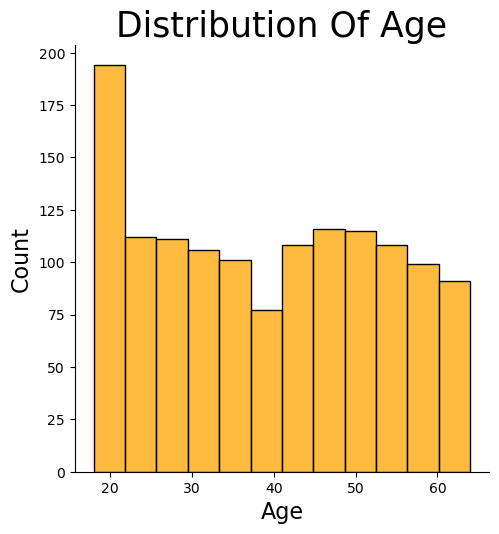

In [8]:
sns.displot(df.age,color='orange')
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Distribution Of Age",fontsize=25)
plt.show()

# Distribution Of BMI

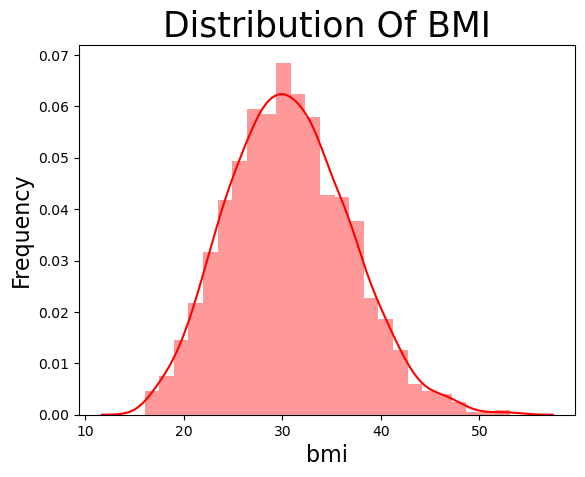

In [9]:
sns.distplot(df['bmi'],color="red")
plt.xlabel("bmi", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Distribution Of BMI",fontsize=25)
plt.show()

# Boxplot of bmi

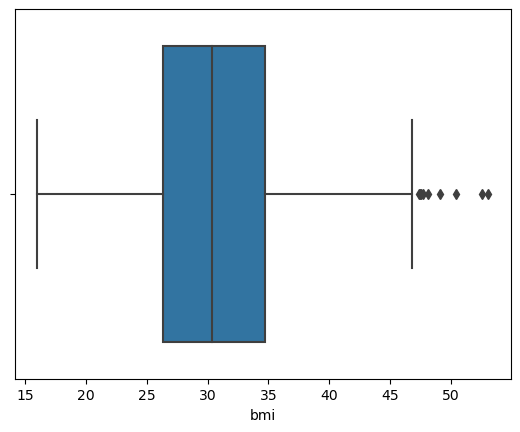

In [10]:
sns.boxplot(x='bmi',data=df)
plt.show()

### We can see from above baxplot that there are some outliers in feature named bmi

# Count of insurance expenses

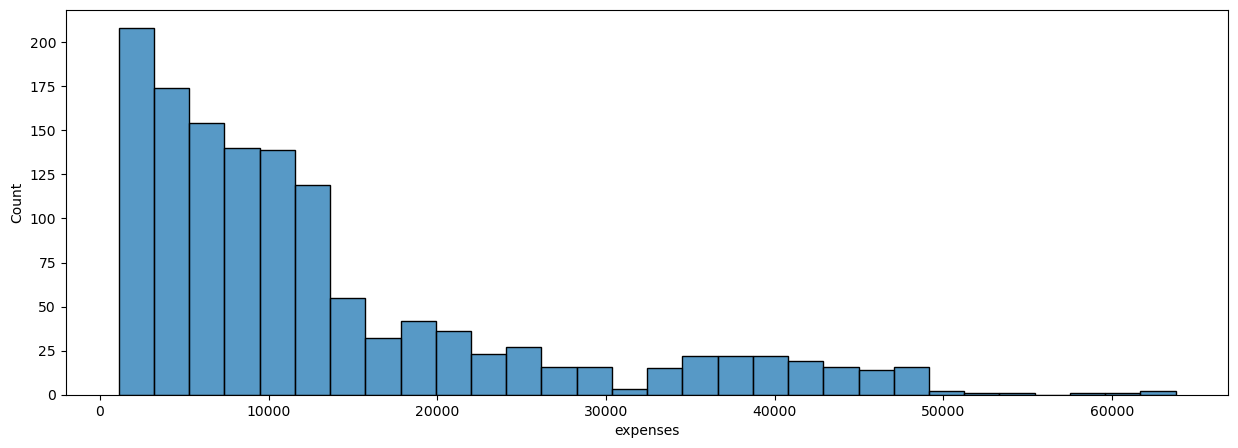

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(x='expenses',data=df)
plt.show()

# Boxplot of expenses

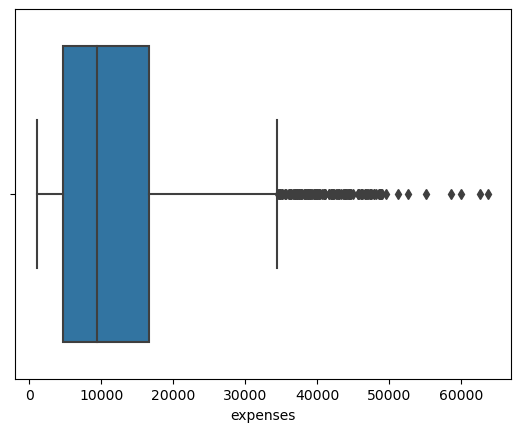

In [12]:
sns.boxplot(x='expenses',data=df)
plt.show()

### From above bapxlot it is clear that there are some outliers in feature called expenses

# Count of smokers and Non-smokers

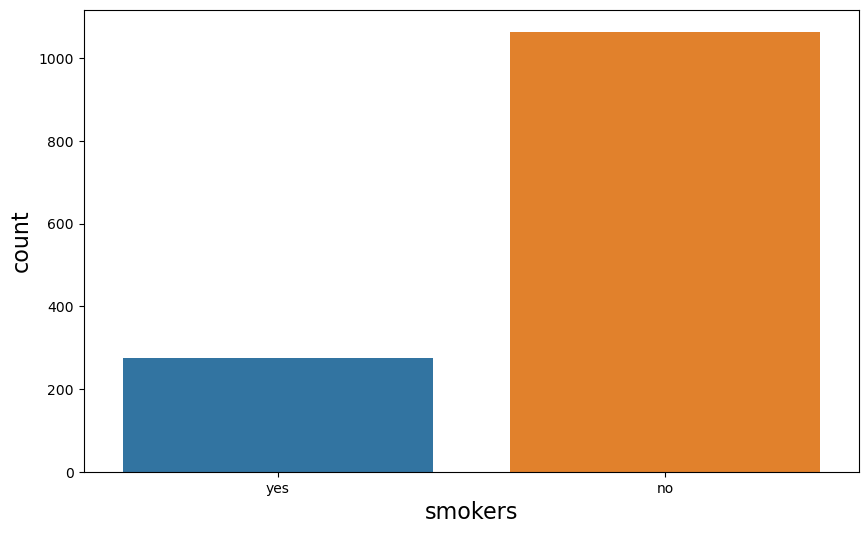

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoker',data=df)
plt.xlabel("smokers", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

### Non smokers are more compared to smokers

# Smoker Vs Expenses

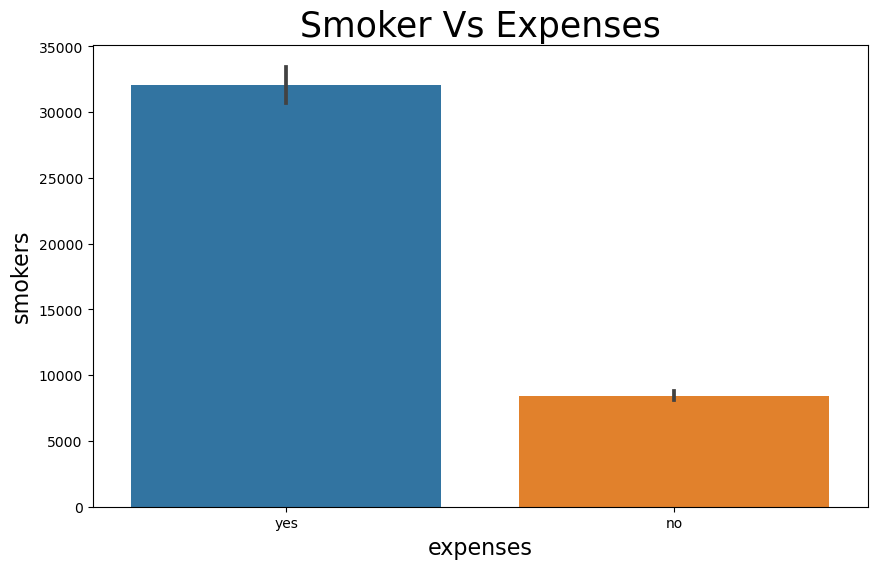

In [14]:
plt.figure(figsize=(10,6))
plt.title("Smoker Vs Expenses",fontsize=25)
sns.barplot(x='smoker',y='expenses',data=df)
plt.xlabel("expenses", fontsize=16)
plt.ylabel("smokers", fontsize=16)
plt.show()

### Expenses of smokers are more as compared to non smokers

# To check expenses based on children

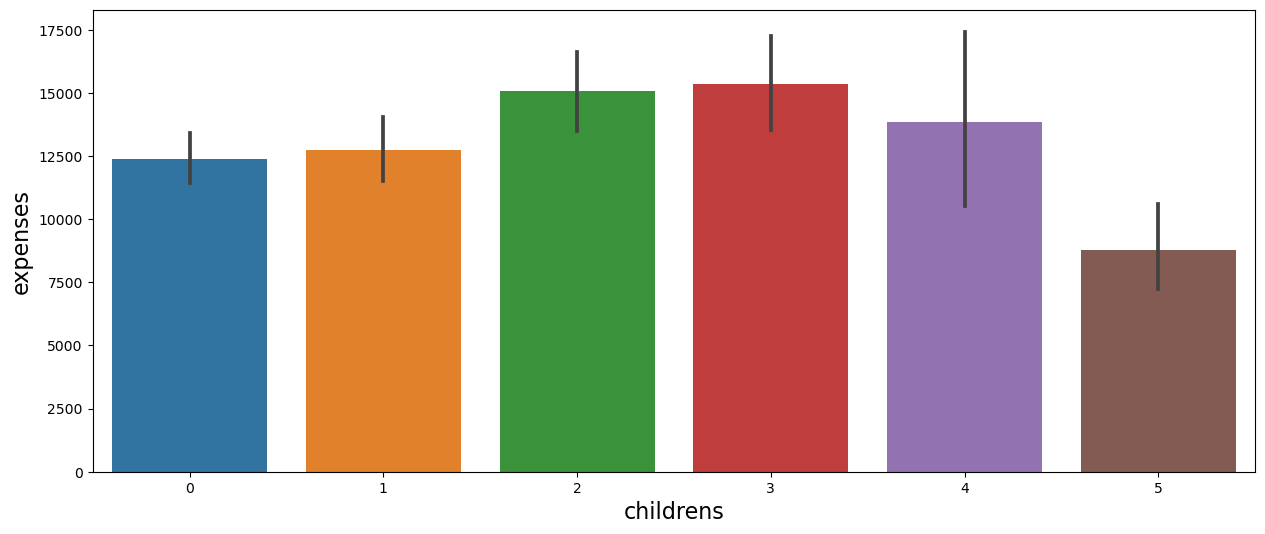

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x='children',y='expenses',data=df)
plt.xlabel("childrens", fontsize=16)
plt.ylabel("expenses", fontsize=16)
plt.show()

# To check expenses with region wise

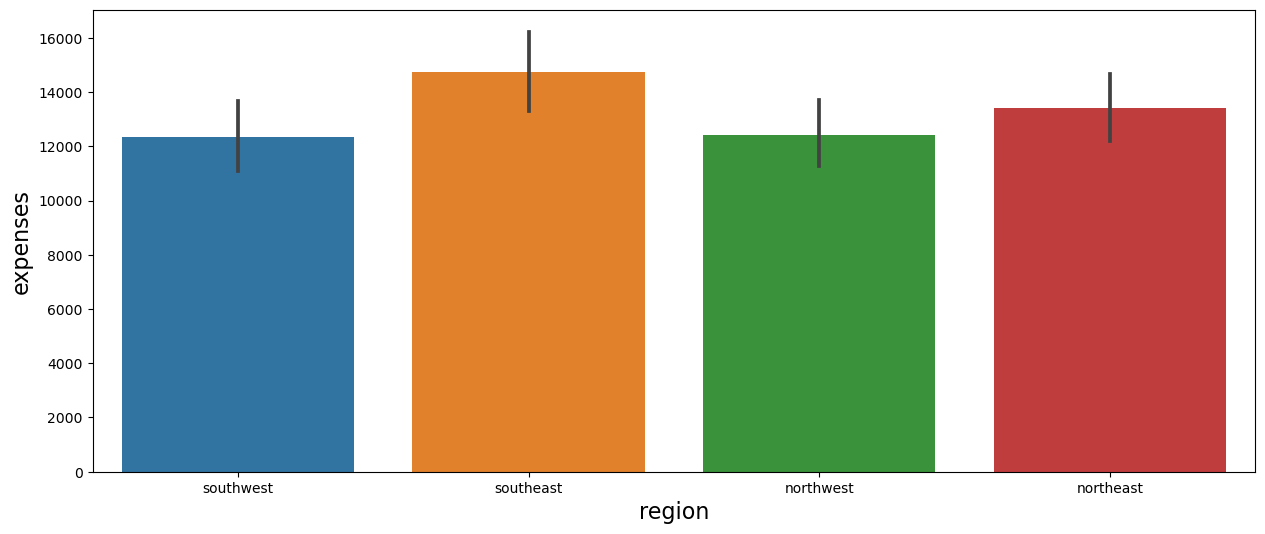

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x='region',y='expenses',data=df)
plt.xlabel("region", fontsize=16)
plt.ylabel("expenses", fontsize=16)
plt.show()

### Southeast region has more expenses then other region



# How Many smoker based on gender

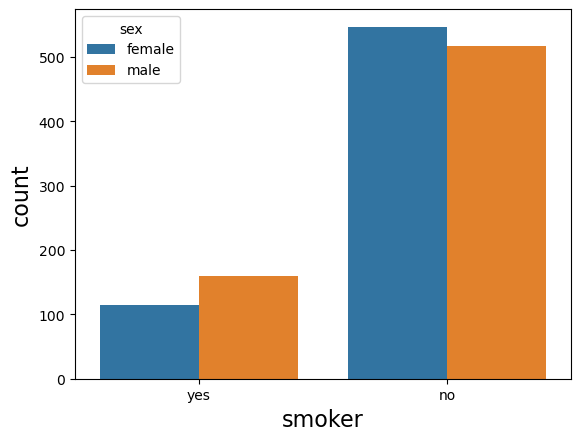

In [17]:
sns.countplot(x=df.smoker,hue=df.sex)
plt.xlabel("smoker", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

# Age Vs Expenses

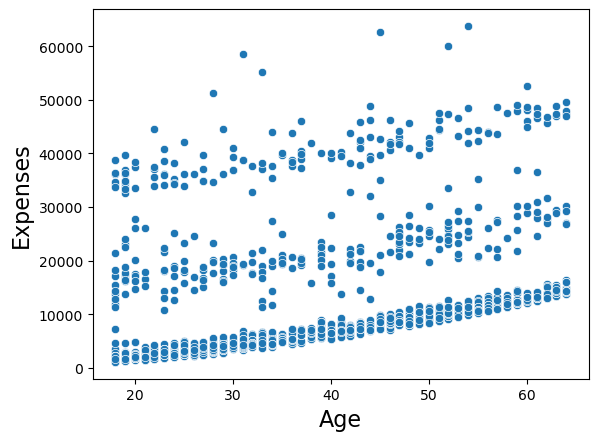

In [18]:
sns.scatterplot(x='age',y='expenses',data=df)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Expenses", fontsize=16)
plt.show()

# BMI Vs Expenses

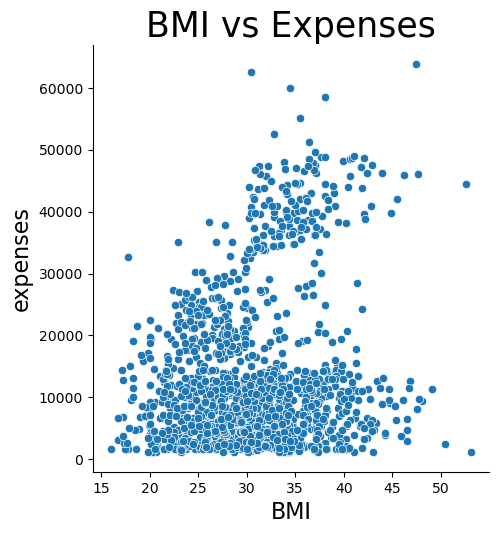

In [19]:
sns.relplot(x='bmi',y='expenses',data=df)
plt.xlabel("BMI", fontsize=16)
plt.ylabel("expenses", fontsize=16)
plt.title("BMI vs Expenses",fontsize=25)
plt.show()

# smokers bmi vs expenses

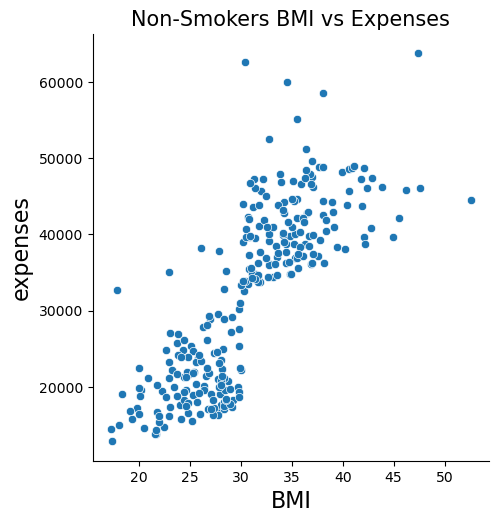

In [20]:
smokers_bmi=df[df['smoker']=='yes']
sns.relplot(x='bmi',y='expenses',data=smokers_bmi)
plt.xlabel("BMI", fontsize=16)
plt.ylabel("expenses", fontsize=16)
plt.title("Non-Smokers BMI vs Expenses",fontsize=15)
plt.show()

# Non smokers bmi vs expenses

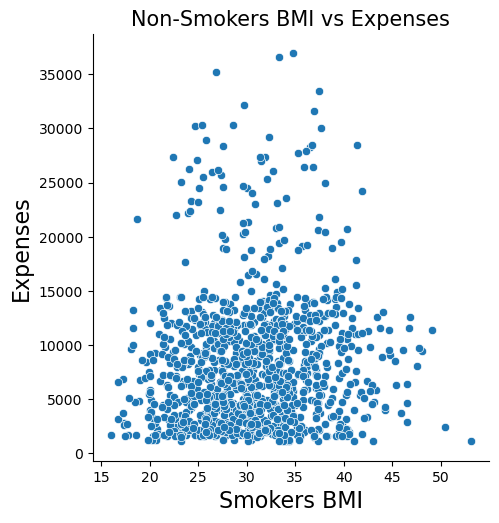

In [21]:
non_smokers_bmi=df[df['smoker']=='no']
sns.relplot(x='bmi',y='expenses',data=non_smokers_bmi)
plt.xlabel("Smokers BMI", fontsize=16)
plt.ylabel("Expenses", fontsize=16)
plt.title("Non-Smokers BMI vs Expenses",fontsize=15)
plt.show()



## Count of region value

In [22]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## replace in numerical values

In [23]:
df.replace({"southeast":1,"southwest":2,"northwest":3,"northeast":4,"yes":1,"no":0,"female":1,"male":0},inplace=True)

## Correlation of data 

In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,-0.076185,0.012816,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,-0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,-0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,-0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


# Heatmap

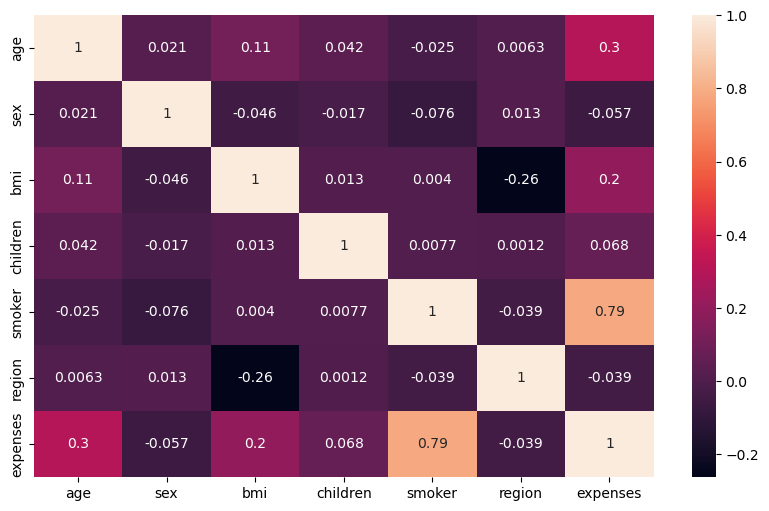

In [25]:
plt.figure(figsize=(10,6))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

# Machine Learning Models (regression)

In [26]:
X=df.drop(['expenses'],axis=1)
Y=df['expenses']

## Dividing the data into train and Test

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print("shape of x train:",(x_train.shape))
print("shape of x test:",(x_test.shape))
print("shape of y train:",(y_train.shape))
print("shape of y test:",(y_test.shape))

shape of x train: (1070, 6)
shape of x test: (268, 6)
shape of y train: (1070,)
shape of y test: (268,)


### 1) Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()

In [29]:
model_LR.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predict=model_LR.predict(x_test)
y_predict

array([ 4380.01198276, 12865.06820564, 12734.75694947, 13184.92421308,
         676.09639392, 32122.14468775, 12830.14949695, 12273.77454708,
        3733.4888483 , 29382.0608243 , 10892.25811624, 17688.94047817,
        8578.60307441,  8481.85264447,  3042.97539813, 10578.41483715,
        3849.42995116,  7072.06439518, 14914.55232596, 14577.88315085,
       12522.13289111, 32897.53345857,  9048.15014321,  9119.88415041,
        2981.60340598,  8153.26722034,  9518.12105528, 10646.00575721,
        7830.89660504,  4343.89008245, 14279.05157173,  5943.46139213,
       34574.8409234 , 27011.48087381, 33266.91199712,  9511.47828411,
       30576.86365382, 26783.73908054, 15091.25976013, 33893.97582716,
        6214.49186478, 14058.59625004, 10601.1544402 , 15230.65680183,
        4313.87963073, 13062.95475897,  4253.50358874, 28537.75305239,
        7235.20255356, 14217.28784587, 13201.82047808, 12457.83377353,
        1856.80326508,  8999.11985325, 26069.13226394, 10048.63097243,
      

In [31]:
LR = model_LR.score(x_train,y_train)*100
LR

74.77367187947179

### 2) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model_DT = DecisionTreeRegressor()

In [34]:
model_DT

DecisionTreeRegressor()

In [35]:
model_DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
DT=model_DT.score(x_test,y_test)*100
DT

72.37343748913622

### 3)Random Forest Regressor Model

In [37]:
from sklearn.ensemble import RandomForestRegressor


In [38]:
model_RFR = RandomForestRegressor()

In [39]:
model_RFR

RandomForestRegressor()

In [40]:
model_RFR.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
RFR=model_RFR.score(x_test,y_test)*100
RFR

85.57810061819457

### 4) XGBoost Model

In [42]:
import xgboost as xgb

In [43]:
model_xgb = xgb.XGBRegressor()

In [44]:
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
xgb = model_xgb.score(x_test,y_test)*100

In [47]:
xgb

81.89113885829163

# Analysis of Result

In [48]:
Models = pd.DataFrame({'Model':['Random Forest','Decision Tree','Linear Regression','XGBoost'],'Accuracy': [RFR, DT, LR, xgb]})

In [49]:
Models

,Model,Accuracy
0,Random Forest,85.578101
1,Decision Tree,72.373437
2,Linear Regression,74.773672
3,XGBoost,81.891139


# Comparison Visuals

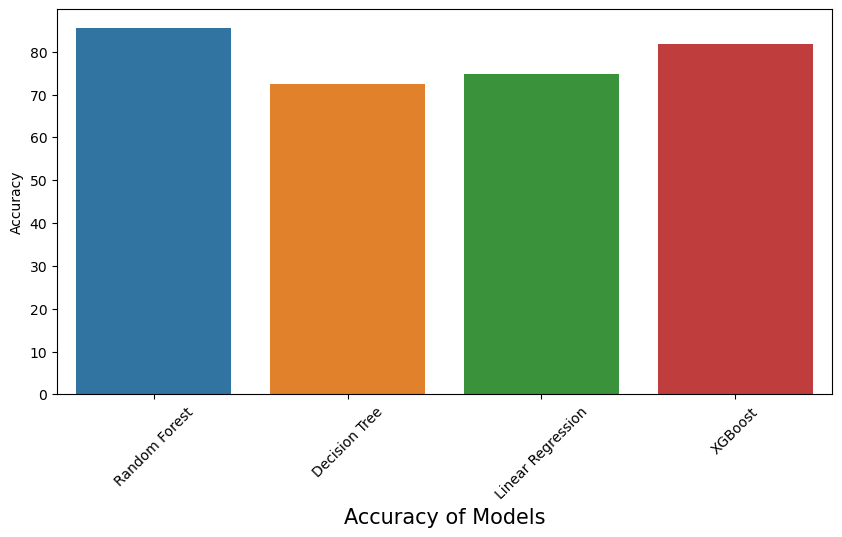

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y= 'Accuracy',data = Models)
plt.xticks(rotation = 45)
plt.xlabel('Accuracy of Models',fontsize =15)
plt.show()

# Conclusion

* Our Random Forest Regressor yields the highest accuracy, 85%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Overfitting). Thus, 85% is the ideal accuracy.
* Our machine learning algorithm can now classify Prediction-of-insurance-premium . Now we can properly check the health insurance or not , & get them the help they needs to comfortable. By chaecking and detecting these features early.

# Reference

* Link of the Dataset:https://www.kaggle.com/code/shikha2609/prediction-of-insurance-premium